In [1]:
!mkdir t1_mri_data

In [2]:
cp Features/Features/prep_wf/sub-2/sub-2_t1_brain-final.nii.gz t1_mri_data

In [1]:
!pip install pyraug

In [2]:
import torch
import torchvision.datasets as datasets
import matplotlib.pyplot as plt
import numpy as np

torch.cuda.is_available()

True

In [3]:
from pyraug.trainers.training_config import TrainingConfig
from pyraug.pipelines.training import TrainingPipeline
from pyraug.pipelines.generation import GenerationPipeline
from pyraug.models import RHVAE
import os

In [4]:
!nvidia-smi

Sun Dec 10 12:03:27 2023       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.129.03             Driver Version: 535.129.03   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  NVIDIA GeForce RTX 3060        Off | 00000000:06:00.0 Off |                  N/A |
|  0%   45C    P8              21W / 170W |    431MiB / 12288MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [7]:
config = TrainingConfig(
    output_dir='my_model',
    train_early_stopping=50,
    learning_rate=1e-4, # Since data is of high dimension decrease the learning rate to avoid nan 
    batch_size=200, # Set to 200 for demo purposes to speed up (default: 50)
    max_epochs=500 # Set to 200 for demo purposes. Augment this in your case (default: 20000)
)

In [8]:
torch.manual_seed(8)
torch.cuda.manual_seed(8)

path_to_images = "t1_mri_data_downsampled"

# Create the Pipeline
pipeline = TrainingPipeline(training_config=config)

# Launch the Pipeline on data coming from a folder
pipeline(train_data=path_to_images, log_output_dir='output_logs')

Data normalized using individual_min_max_scaling.
 -> If this is not the desired behavior pass an instance of DataProcess with 'data_normalization_type' attribute set to desired normalization or None

Model passed sanity check !

Created my_model/training_2023-12-10_12-04-21. 
Training config, checkpoints and final model will be saved here.

Successfully launched training !
----------------------------------
Training ended!
Saved final model in my_model/training_2023-12-10_12-04-21/final_model


In [6]:
from nilearn.image import resample_img
import nibabel as nib

# Load the image
nii_image = nib.load('t1_mri_data/sub-2_t1_brain-final.nii.gz')

# Resample the image (Optional)
# Adjust target_affine and target_shape as needed
resampled_image = resample_img(nii_image, target_affine=np.eye(4), target_shape=(32, 32, 189))

# Save with higher compression
nib.save(resampled_image, 't1_mri_data_downsampled/sub-2_t1_brain-final_downsampled.nii.gz')


In [9]:
image_data = nib.load('t1_mri_data/sub-2_t1_brain-final.nii.gz').get_fdata()

In [11]:
image_data.shape

(197, 233, 189)

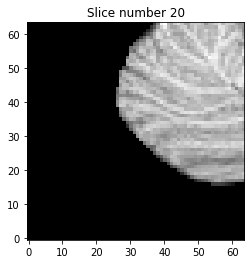

In [13]:
nii_image_down = nib.load('t1_mri_data_downsampled/sub-2_t1_brain-final_downsampled.nii.gz')
slice_number = 20  # Adjust this based on your image

# Display a specific slice (e.g., axial slice)
plt.imshow(nii_image_down.get_fdata()[:, :, slice_number].T, cmap='gray', origin='lower')
plt.title(f'Slice number {slice_number}')
plt.show()

In [22]:
torch.cuda.empty_cache()

In [1]:
!nvidia-smi

|   0  NVIDIA GeForce RTX 3060        Off | 00000000:06:00.0 Off |                  N/A |
|  0%   46C    P2              51W / 170W |    431MiB / 12288MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+----------------------+
|   1  NVIDIA GeForce GTX 1080 Ti     Off | 00000000:09:00.0 Off |                  N/A |
| 23%   29C    P8               9W / 250W |    142MiB / 11264MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+----------------------+
|   2  NVIDIA GeForce GTX 1080 Ti     Off | 00000000:0A:00.0 Off |                  N/A |
| 21%   25C    P8               9W / 250W |      4MiB / 11264MiB |      0%      Default |
|                                         |                      |                  N/A |
+---------